# Entanglement Classifier Trial Notebook

### Importing Dependencies

In [12]:
import numpy as np

from components.system import System
from components.connection import ConnectionFactory, Connection
from components.model import Model
from components.connection_functions import DrivenCascadeFunction, EnergyExchangeFunction

### Setting up the system

In [13]:
reservoir_nodes=2
system_nodes=1

In [14]:
"""
Defining System setup
"""

system_state = np.array([[1, 0], [0, 0]])
system_node_list = [0]

if len(system_node_list) != system_nodes:
    raise Exception

system_connections = {}

system = System(
    init_quantum_state=system_state, nodes=system_node_list, connections=system_connections
)

### Setting up the interface

In [15]:

"""
Defining Interface setup
"""

interfaceFactory = ConnectionFactory(DrivenCascadeFunction, gamma_1=1, gamma_2=1)

### Setting up the reservoir

In [16]:
"""
Defining Reservoir setup
"""

reservoirFactory = ConnectionFactory(EnergyExchangeFunction, is_hamiltonian=True, J=10)

### Setting up the model

In [17]:
model = Model()
model.setSystem(system)
model.setReservoirConnectionFac(reservoirFactory)
model.setInterfaceConectionFac(interfaceFactory)
model.generateReservoir(reservoir_nodes, init_quantum_state=0)
model.generateInterface()
model.setRunDuration(2.5)
model.setRunResolution(0.001)


In [18]:
model.run()

C:\Users\mmack\anaconda3\envs\entanglement_classifier\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


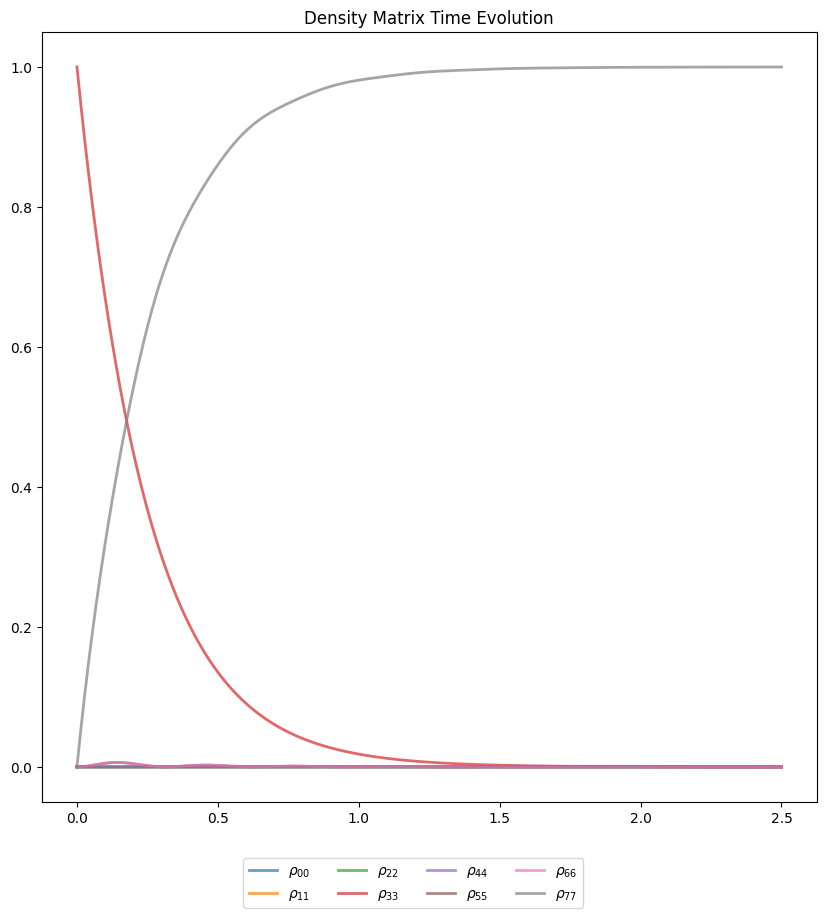

In [19]:
log = model.modelLog
log.plot()

In [20]:
np.linalg.eigvals(list(log.time_log.values())[10])

array([ 9.60982884e-01-4.61466743e-21j, -1.83744146e-12+2.92060157e-21j,
        2.79547945e-28-3.44694283e-29j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  3.90171162e-02+0.00000000e+00j])

In [21]:
list(log.time_log.values())[100]

array([[ 0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ],
       [ 0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ],
       [ 0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ],
       [ 0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.67032005+0.j       ,
         0.        +0.j       , -0.03115679-0.0504883j,
        -0.03115679-0.0504883j,  0.        +0.j       ],
       [ 0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +

In [22]:
con = model.interface.connections
list(con.values())[0].function.gamma_4

AttributeError: 'DrivenCascadeFunction' object has no attribute 'gamma_4'